## Seaborn

那么Pandas与Seaborn之间有什么区别呢？

其实两者都是使用了matplotlib来作图，但是有非常不同的设计差异

1. 在只需要简单地作图时直接用Pandas，但要想做出更加吸引人，更丰富的图就可以使用Seaborn
2. Pandas的作图函数并没有太多的参数来调整图形，所以你必须要深入了解matplotlib
3. Seaborn的作图函数中提供了大量的参数来调整图形，所以并不需要太深入了解matplotlib
4. Seaborn的API：https://stanford.edu/~mwaskom/software/seaborn/api.html#style-frontend

## 泰坦尼克号数据分析

这是是历史中著名的海难事件，大量游客在事故中丧生，也有部分游客获救。现在这里有一份数据给出一批乘客的信息如姓名、年龄、性别、票价等等一些信息，和是否获救，然后让你建模分析，再去预测另一批乘客的获救与否。我们一起来看看

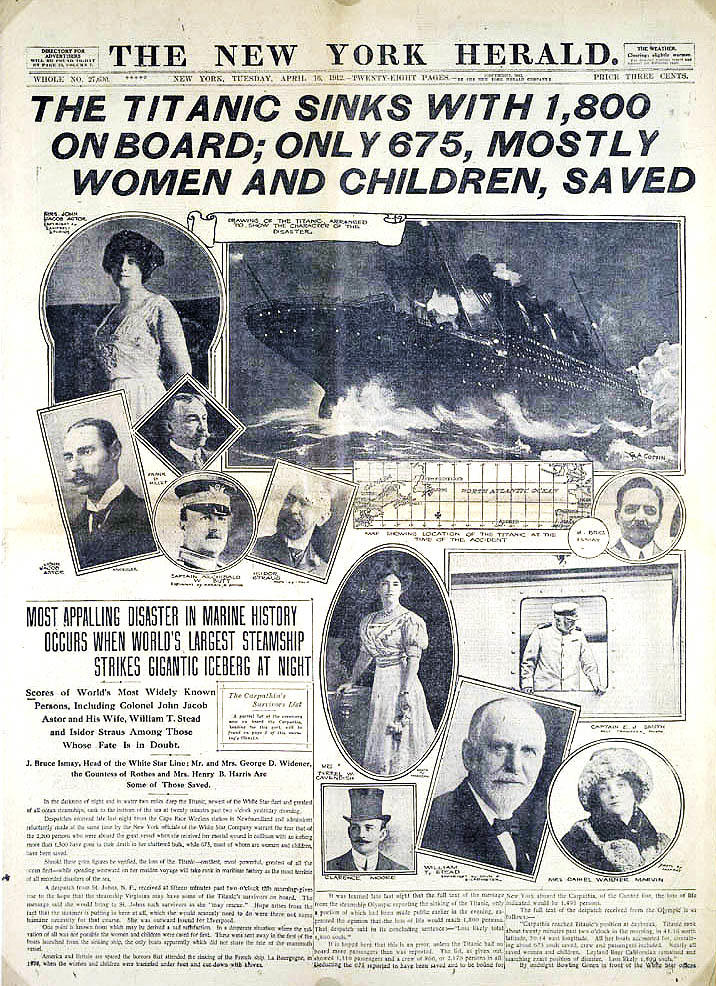

## 掌握数据概况

In [35]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils.testing import ignore_warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv") # 留作练习让你们分析

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId => 乘客ID
-　Survived => 是否获救
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


粗略观察一下数据，发现age里有不少缺失，Cabin（舱号）大量缺失，其他属性个别缺失

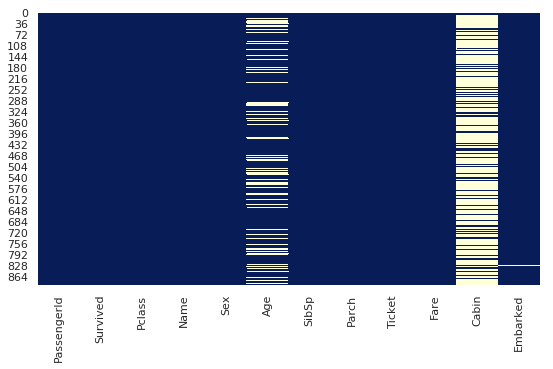

In [6]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [7]:
# 这些是类别列
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

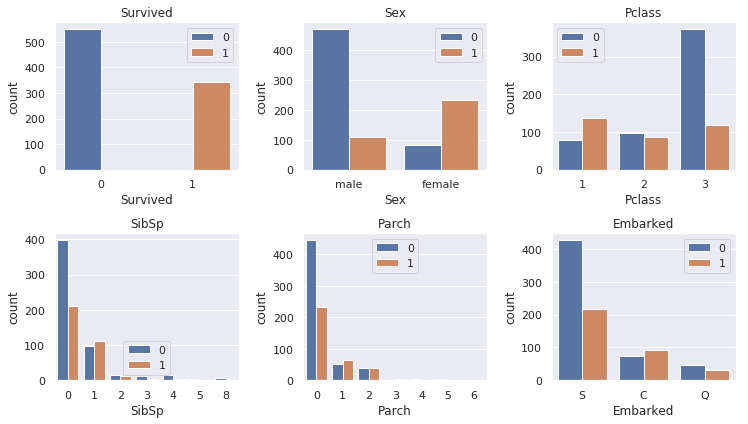

In [8]:
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df_train[cols[i]], hue=df_train["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend() 
        
plt.tight_layout()  

### 认识数据

- 第一张图：？
- 第二张图：？
- 第三张图：？
- 第四，五张图：？
- 第六张图: ？

### 看看年龄的因素 

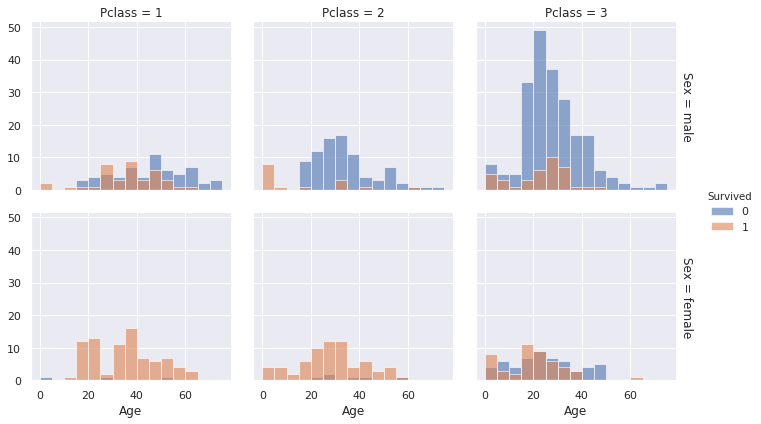

In [9]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

In [10]:
# 分析一下

### 看看你票价因素 

In [11]:
df_train['Fare'].max()

512.3292

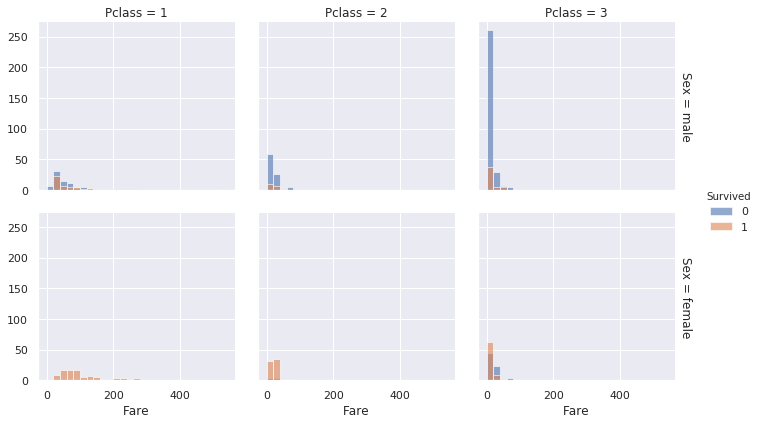

In [12]:
bins = np.arange(0, 550, 20)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

### 仓位因素

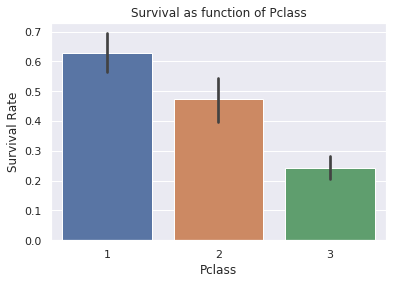

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

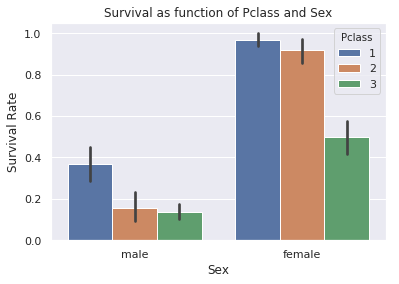

In [14]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

### 登船口因素

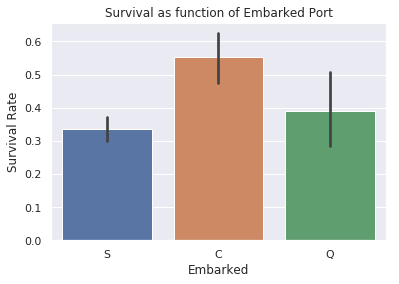

In [15]:
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

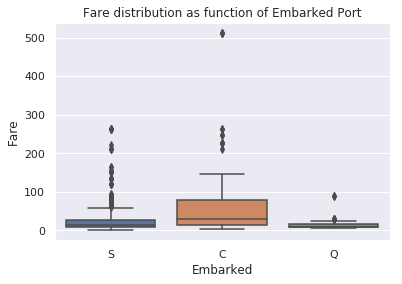

In [16]:
sns.boxplot(x='Embarked', y='Fare', data=df_train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

## 增加一些新维度

### 家庭大小，单独，名字长度，称呼

In [17]:
for df in [df_train, df_test] :
    
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    df['Alone']=0
    df.loc[(df.FamilySize==0),'Alone'] = 1
    
    df['NameLen'] = df.Name.apply(lambda x : len(x)) 
    df['NameLenBin']=np.nan
    for i in range(20,0,-1):
        df.loc[ df['NameLen'] <= i*5, 'NameLenBin'] = i
    
    
    df['Title']=0
    df['Title']=df.Name.str.extract(r'([A-Za-z]+)\.') #lets extract the Salutations
    df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

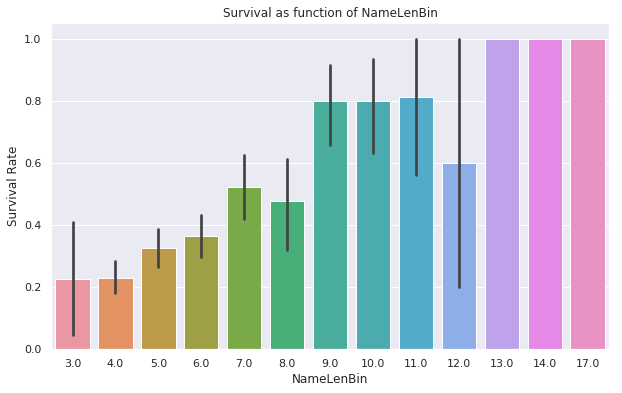

In [18]:
plt.subplots(figsize=(10,6))
sns.barplot(x='NameLenBin' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of NameLenBin")
plt.show()

### 结论？？

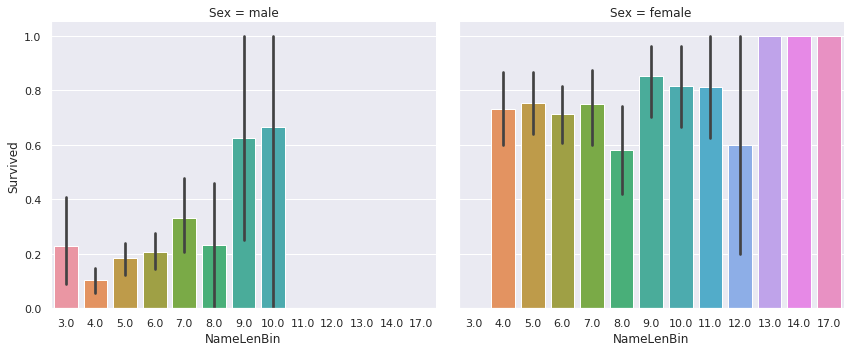

In [19]:
g = sns.factorplot(x="NameLenBin", y="Survived", col="Sex", data=df_train, kind="bar", size=5, aspect=1.2)

### 结论？？

### 称呼因素

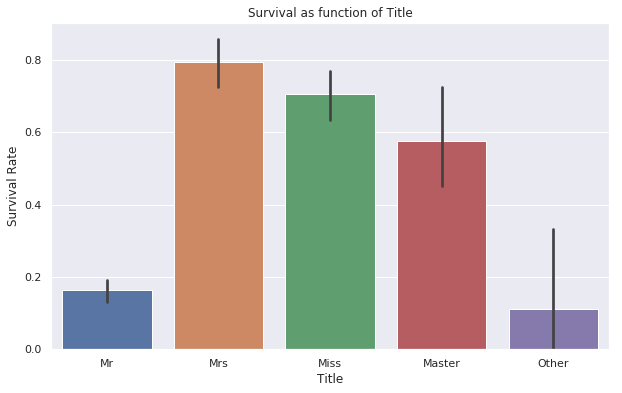

In [20]:
plt.subplots(figsize=(10,6))
sns.barplot(x='Title' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Title")
plt.show()

In [21]:
pd.crosstab(df_train.FamilySize,df_train.Survived).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

Survived,0,1
FamilySize,,
0,0.696462,0.303538
1,0.447205,0.552795
2,0.421569,0.578431
3,0.275862,0.724138
4,0.8,0.2
5,0.863636,0.136364
6,0.666667,0.333333
7,1,0
10,1,0


### 结论？？

## 数据清洗

### 第一步填充缺失数据

In [22]:
# 根据称呼补充他们的性别
df_train['Title'] = df_train['Title'].fillna(df_train['Title'].mode().iloc[0])

# 年龄使用平均值填充
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Mr'),'Age']= df_train.Age[df_train.Title=="Mr"].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Mrs'),'Age']= df_train.Age[df_train.Title=="Mrs"].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Master'),'Age']= df_train.Age[df_train.Title=="Master"].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Miss'),'Age']= df_train.Age[df_train.Title=="Miss"].mean()
df_train.loc[(df_train.Age.isnull())&(df_train.Title=='Other'),'Age']= df_train.Age[df_train.Title=="Other"].mean()
df_train = df_train.drop('Name', axis=1)

In [23]:
# 设置登船口默认值是第一个
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0])
# 票价用平均值填充
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())

### 定量（Quantitative）转换：

#### 4.3 Scaling

Scaling可以将一个很大范围的数值映射到一个很小范围（通常是 -1到1，或者是0到1），很多情况下我们需要将数值做Scaling使其范围大小一样，否则大范围数特征将会有更高的权重。比如：Age的范围可能只是0-100，而income的范围可能是0-10000000，在某些对数组大小敏感的模型中会影响其结果。

下面对Age进行Scaling：

#### 4.4 Binning


Binning通过观察“邻居”（即周围的值）将连续数据离散化。存储的值被分布到一些“桶”或“箱”中，就像直方图的bin将数据划分成几块一样。
下面的代码对Fare进行Binning。

In [24]:
# 年龄按10年分段，票价按50分段，方便查找规律
df = df_train
df['Age_bin']=np.nan
for i in range(8,0,-1):
    df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

df['Fare_bin']=np.nan
for i in range(12,0,-1):
    df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i        

# 把文字变成数字，让计算机更好处理
df['Title'] = df['Title'].map( {'Other':0, 'Mr': 1, 'Master':2, 'Miss': 3, 'Mrs': 4 } )
# 如果称呼为空，填充第一个
df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
df['Title'] = df['Title'].astype(int) 

In [25]:
# 复制一份数据，保护原始数据
df_train_ml = df_train.copy()

In [26]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
Alone          891 non-null int64
NameLen        891 non-null int64
NameLenBin     891 non-null float64
Title          891 non-null int64
Age_bin        891 non-null float64
Fare_bin       891 non-null float64
dtypes: float64(5), int64(9), object(4)
memory usage: 125.4+ KB


## 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。 所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。 所有的数据可以分为两类：

- 1.定性（Qualitative）变量可以以某种方式，Age就是一个很好的例子。
- 2.定量（Quantitative）变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。

### 定性（Qualitative）转换：

#### 4.1 Dummy Variables

就是类别变量或者二元变量，当qualitative variable是一些频繁出现的几个独立变量时，Dummy Variables比较适用。我们以Sex, Embarked, Pclass 可以使用下面的代码将其转换为dummies：

In [37]:
# 把类别参数做成新的列，用０－１表示对应项
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Ticket','Cabin','Age', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)
df_train_ml.drop(['NameLen'], axis=1, inplace=True)
df_train_ml.drop(['SibSp'], axis=1, inplace=True)
df_train_ml.drop(['Parch'], axis=1, inplace=True)
df_train_ml.drop(['Alone'], axis=1, inplace=True)

KeyError: "['Sex' 'Embarked' 'Pclass'] not in index"

### 4.2 Factoring

dummy不好处理Cabin（船舱号）这种标称属性，因为他出现的变量比较多。所以Pandas有一个方法叫做factorize()，它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，这种映射最后只生成一个特征，不像dummy那样生成多个特征

In [29]:
df_train_ml.head()

,Survived,Fare,FamilySize,NameLenBin,Title,Age_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,7.2500,1,5.0,1,3.0,1,0,1,0,1
1,1,71.2833,1,11.0,4,4.0,0,0,0,0,0
2,1,7.9250,0,5.0,3,3.0,0,0,1,0,1
3,1,53.1000,1,9.0,4,4.0,0,0,1,0,0
4,0,8.0500,0,5.0,1,4.0,1,0,1,0,1


In [31]:
# 复制一份数据，保护原始数据
train_data = df_train.copy()

In [36]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

train_data[['Cabin','CabinLetter']].head()

,Cabin,CabinLetter
0,U0,0
1,C85,1
2,U0,0
3,C123,1
4,U0,0


## 5.特征工程


在进行特征工程的时候，我们不仅需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布。

In [38]:
train_df_org = pd.read_csv("titanic/train.csv")
test_df_org = pd.read_csv("titanic/test.csv")
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)   #891+418=1309rows, 12columns
PassengerId = test_df_org['PassengerId']

对数据进行特征工程，也就是从各项参数中提取出对输出结果有或大或小的影响的特征，将这些特征作为训练模型的依据。一般来说，我们会先从含有缺失值的特征开始。

### 5.1 Embarked

因为“Embarked”项的缺失值不多，所以这里我们以众数来填充：

In [39]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)

对于三种不同的港口，由上面介绍的数值转换，我们知道可以有两种特征处理方式；dummy和factorizing。因为只有三个港口，所以我们可以直接用dummy来处理：

In [40]:
#为了后面的特征分析，这里我们将Embarked特征进行factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
 
#使用pd.get_dummies获取one-hot编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

### 5.2 Sex

对Sex也进行one-hot编码，也就是dummy处理：

In [41]:
# 为了后面的特征分析，这里我们也将Sex特征进行factorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
 
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)

In [42]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,1,0,0,1,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,0,1,0,0,1
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,0,0,0,1
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,1,0,0,0,1
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,0,0,1,0


### 5.3 Name

首先从名字中提取各种称呼

In [45]:
# what is each person's title?
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
combined_train_test['Title'] = combined_train_test['Title'].apply(lambda x:x.strip())

下面的语句执行后有问题。

将各式称呼进行统一化处理：

In [46]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
 
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

使用dummy对不同的称呼进行分列：

In [47]:
#为了后面的特征分析，这里我们也将Title特征进行factorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'],prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test,title_dummies_df],axis=1)

In [48]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Sex_0,Sex_1,Title,Title_-1,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,1,0,0,0,1,0,0,0,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,1,1,0,0,1,0,0,0,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,...,0,1,2,0,0,0,1,0,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,1,1,0,0,1,0,0,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,...,1,0,0,0,1,0,0,0,0,0


In [49]:
# 增加名字长度的特征
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

### 5.4 Fare

由前面分析可以知道，Fare项在测试数据中缺少一个值，所以需要对该值进行填充。我们按照一二三等舱各自的均价来填充：

下面transform将函数np.mean应用到各个group中

In [51]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

通过对Ticket数据的分析，我们可以看到部分票号数据有重复，同时结合亲属人数及名字的数据，和票价船舱等级对比，我们可以知道购买的票中有家庭票和团体票，所以我们需要将团体票的票价分配到每个人的头上。

In [53]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare']/combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'],axis=1,inplace=True)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Sex_1,Title,Title_-1,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Name_length
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,0,1,0,0,0,0,0,23
1,38.0,C85,1,17.820825,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,1,1,0,0,1,0,0,0,0,51
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,3,1,0,...,1,2,0,0,0,1,0,0,0,22
3,35.0,C123,0,13.275000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,1,1,0,0,1,0,0,0,0,44
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,3,0,0,...,0,0,0,1,0,0,0,0,0,24


使用binning给票价分等级：

In [56]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title,Title_-1,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Name_length,Fare_bin
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,1,0,0,0,0,0,23,"(3.615, 7.5]"
1,38.0,C85,1,17.820825,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,1,0,0,1,0,0,0,0,51,"(13.0, 50.496]"
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,3,1,0,...,2,0,0,0,1,0,0,0,22,"(7.5, 8.05]"
3,35.0,C123,0,13.275000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,1,0,0,1,0,0,0,0,44,"(13.0, 50.496]"
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,3,0,0,...,0,0,1,0,0,0,0,0,24,"(7.5, 8.05]"


对于5个等级的票价我们可以继续使用dummy为票价等价分列：

In [57]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)
 
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]
 
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df],axis=1)
combined_train_test.drop(['Fare_bin'],axis=1, inplace=True)

In [58]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title_3,Title_4,Title_5,Name_length,Fare_bin_id,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,0,23,0,1,0,0,0,0
1,38.0,C85,1,17.820825,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,51,1,0,1,0,0,0
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,3,1,0,...,0,0,0,22,2,0,0,1,0,0
3,35.0,C123,0,13.275000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,44,1,0,1,0,0,0
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,3,0,0,...,0,0,0,24,2,0,0,1,0,0


### 5.5 Pclass

Pclass这一项，其实已经可以不用继续处理了，我们只需将其转换为dummy形式即可。 但是为了更好的分析，我们这里假设对于不同等级的船舱，各船舱内部的票价也说明了各等级舱的位置，那么也就很有可能与逃生的顺序有关系。所以这里分析出每等舱里的高价和低价位。

In [59]:
print(combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean())

Pclass
1    18.433591
2     8.188990
3     5.971156
Name: Fare, dtype: float64


In [61]:
from sklearn.preprocessing import LabelEncoder
 
#建立Pclass Fare Category
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare,pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'

Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(1)
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(2)
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(3)
 
#建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category,args=(
        Pclass1_mean_fare,Pclass2_mean_fare,Pclass3_mean_fare),axis=1)
pclass_level = LabelEncoder()
 
#给每一项添加标签
pclass_level.fit(np.array(['Pclass1_Low','Pclass1_High','Pclass2_Low','Pclass2_High','Pclass3_Low','Pclass3_High']))
 
#转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])
 
# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test,pclass_dummies_df],axis=1)


In [62]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,0,4,0,0,0,0,1,0
1,38.0,C85,1,17.820825,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,1,0,1,0,0,0,0
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,3,1,0,...,1,0,0,4,0,0,0,0,1,0
3,35.0,C123,0,13.275000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,1,0,1,0,0,0,0
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,3,0,0,...,1,0,0,4,0,0,0,0,1,0


同时，我们将Pclass特征factorize化：

In [63]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,4,0,0,0,0,1,0
1,38.0,C85,1,17.820825,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,1,0,1,0,0,0,0
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,0,1,0,...,1,0,0,4,0,0,0,0,1,0
3,35.0,C123,0,13.275000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,1,0,1,0,0,0,0
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,0,0,0,...,1,0,0,4,0,0,0,0,1,0


## 5.6 Parch and SibSp

由前面的分析，我们可以知道，亲友的数量没有或者太多会影响到Survived。所以将二者合并为FamliySize这一组合项，同时也保留这两项。

In [64]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

In [65]:
family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                        prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

## 5.7 Age

因为Age项的缺失值较多，所以不能直接填充age的众数或者平均数。

常见的有两种对年龄的填充方式：一种是根据Title中的称呼，如Mr，Master、Miss等称呼不同类别的人的平均年龄来填充；一种是综合几项如Sex、Title、Pclass等其他没有缺失值的项，使用机器学习算法来预测Age。

这里我们使用后者来处理。以Age为目标值，将Age完整的项作为训练集，将Age缺失的项作为测试集

In [67]:
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,3,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,0,0
26,NaN,1,0,0,23,1,1,7.2250,0,0
28,NaN,2,1,2,29,1,1,7.8792,2,0


建立Age的预测模型，我们可以多模型预测，然后再做模型的融合，提高预测的精度。



In [68]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])

    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

利用融合模型预测的结果填充Age的缺失值：

In [69]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    0.8s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-126.6417992078393
GB Train Error for "Age" Feature Regressor:-62.77442985657951
5     37.244472
17    29.531059
19    32.412213
26    28.921874
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    0.5s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-121.0220855900092
RF Train Error for "Age" Feature Regressor-97.3260253418469
5     31.833667
17    31.828987
19    30.241771
26    28.111768
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     29.483183
17    29.483183
19    29.483183
26    29.483183
Name: Age, dtype: float64


In [70]:
missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,29.483183,2,0,0,16,1,1,8.4583,3,0
17,29.483183,0,0,0,28,1,1,13.0000,3,2
19,29.483183,1,1,1,23,1,1,7.2250,0,0
26,29.483183,1,0,0,23,1,1,7.2250,0,0
28,29.483183,2,1,2,29,1,1,7.8792,2,0


### 5.8 Ticket

观察Ticket的值，我们可以看到，Ticket有字母和数字之分，而对于不同的字母，可能在很大程度上就意味着船舱等级或者不同船舱的位置，也会对Survived产生一定的影响，所以我们将Ticket中的字母分开，为数字的部分则分为一类

In [71]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)

# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0, inplace=True)

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,1,0,2,2,0,0,1,0
1,38.0,C85,1,17.820825,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,2,2,0,0,1,1
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,1,0,1,1,0,1,0,2
3,35.0,C123,0,13.275000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,0,2,2,0,0,1,3
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,1,0,1,1,0,1,0,3


## 5.9 Cabin

因为Cabin项的缺失值确实太多了，我们很难对其进行分析，或者预测。所以这里我们可以直接将Cabin这一项特征去除。但通过上面的分析，可以知道，该特征信息的有无也与生存率有一定的关系，所以这里我们暂时保留该特征，并将其分为有和无两类。

In [72]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

## 5.10 特征间相关性分析

我们挑选一些主要的特征，生成特征之间的关联图，查看特征与特征之间的相关性

In [73]:
Correlation = pd.DataFrame(combined_train_test[['Embarked','Sex','Title','Name_length','Family_Size',
                                                'Family_Size_Category','Fare','Fare_bin_id','Pclass',
                                                'Pclass_Fare_Category','Age','Ticket_Letter','Cabin']])

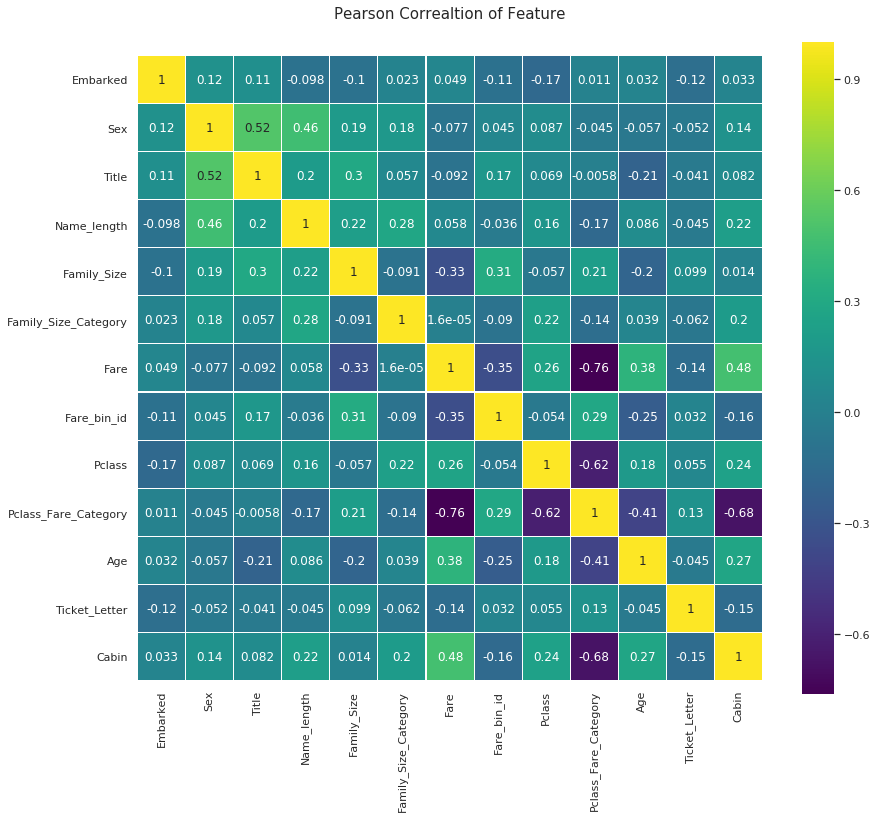

In [74]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correaltion of Feature',y=1.05,size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

LinAlgError: singular matrix

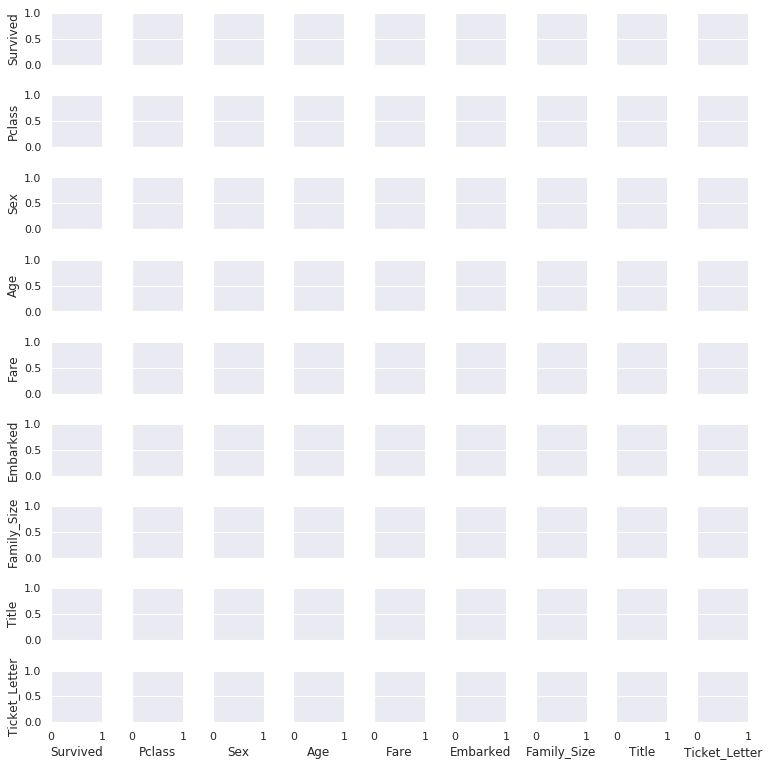

In [75]:
## 5.11 特征之间的数据分布图

g = sns.pairplot(combined_train_test[[u'Survived',u'Pclass',u'Sex',u'Age',u'Fare',u'Embarked',
                                      u'Family_Size',u'Title',u'Ticket_Letter']],hue='Survived',
                                      palette = 'seismic',size=1.2,diag_kind ='kde',diag_kws=
                                      dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

## 5.12 输入模型前的一些处理：

### 5.12.1 一些数据的正则化 这里我们将Age和fare进行正则化：

In [ ]:
from sklearn import preprocessing
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare','Name_length']])
combined_train_test[['Age','Fare','Name_length']] = scale_age_fare.transform(combined_train_test[['Age','Fare','Name_length']])

In [76]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,22.0,0,0,7.250000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,1,0,2,2,0,0,1,0
1,38.0,1,1,17.820825,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,2,2,0,0,1,1
2,26.0,0,0,7.925000,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,1,0,1,1,0,1,0,2
3,35.0,1,0,13.275000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,0,2,2,0,0,1,3
4,35.0,0,0,8.050000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,1,0,1,1,0,1,0,3


### 5.12.2 弃掉无用特征

对于上面的特征工程中，我们从一些原始的特征中提取出了很多要融合到模型中的特征，但是我们需要剔除那些原本的我们用不到的或者非数值特征： 首先对我们的数据先进行一下备份，以便后期的再次分析

In [77]:
combined_data_backup = combined_train_test

combined_train_test.drop(['PassengerId','Embarked','Sex','Name','Fare_bin_id','Pclass_Fare_Category', 'Parch','SibSp','Family_Size_Category','Ticket'],axis=1,inplace=True)

#### 5.12.3 将训练数据和测试数据分开：

In [78]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
 
titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [79]:
titanic_train_data_X.shape

(891, 34)

In [80]:
titanic_train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 34 columns):
Age                       891 non-null float64
Cabin                     891 non-null int64
Fare                      891 non-null float64
Pclass                    891 non-null int64
Embarked_0                891 non-null uint8
Embarked_1                891 non-null uint8
Embarked_2                891 non-null uint8
Sex_0                     891 non-null uint8
Sex_1                     891 non-null uint8
Title                     891 non-null int64
Title_-1                  891 non-null uint8
Title_0                   891 non-null uint8
Title_1                   891 non-null uint8
Title_2                   891 non-null uint8
Title_3                   891 non-null uint8
Title_4                   891 non-null uint8
Title_5                   891 non-null uint8
Name_length               891 non-null int64
Fare_0                    891 non-null uint8
Fare_1                    891 non-nu

### 6. 模型融合及测试

模型融合的过程需要分几步来进行。

6.1 利用不同的模型来对特征进行筛选，选出较为重要的特征：

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    
    #randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=25,cv=10,verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Feeatures from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=25,cv=10,verbose=1)
    et_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=25,cv=10,verbose=1)
    gb_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
    dt_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_et,features_top_n_gb,features_top_n_dt],
                              ignore_index=True).drop_duplicates()
    features_importance = pd.concat([feature_imp_sorted_rf,feature_imp_sorted_ada,feature_imp_sorted_et,
                                     feature_imp_sorted_gb,feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n,features_importance


## 2 依据我们筛选出的特征构建训练集和测试集

但如果在进行特征工程的过程中，产生了大量的特征，而特征与特征之间会存在一定的相关性。太多的特征一方面会影响训练的速度，另一方面也可能会使得模型过拟合。所以在特征太多的情况下，我们可以利用不同的模型对特征进行筛选，选取我们想要的前n个特征。

In [82]:
feature_to_pick = 30
feature_top_n,feature_importance = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.2s remaining:    1.2s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    2.4s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8361391694725028
Top N Features RF Train Score:0.9809203142536476
Sample 10 Feeatures from RF Classifier
17      Name_length
0               Age
2              Fare
8             Sex_1
11          Title_0
9             Title
7             Sex_0
3            Pclass
29      Family_Size
33    Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.3s remaining:    1.2s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    2.4s finished


Top N Features Best Ada Params:{'learning_rate': 0.1, 'n_estimators': 500}
Top N Features Best Ada Score:0.819304152637486
Top N Features Ada Train Score:0.8439955106621774
Sample 10 Features from Ada Classifier:
2              Fare
0               Age
17      Name_length
33    Ticket_Letter
29      Family_Size
14          Title_3
11          Title_0
3            Pclass
1             Cabin
4        Embarked_0
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.0s remaining:    1.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    2.2s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best DT Score:0.8271604938271605
Top N Features ET Train Score:0.9730639730639731
Sample 10 Features from ET Classifier:
11          Title_0
7             Sex_0
8             Sex_1
17      Name_length
0               Age
2              Fare
1             Cabin
9             Title
33    Ticket_Letter
3            Pclass
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    7.3s remaining:    4.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    8.0s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7878787878787878
Top N Features GB Train Score:0.9977553310886644
Sample 10 Feature from GB Classifier:
2              Fare
17      Name_length
0               Age
11          Title_0
33    Ticket_Letter
3            Pclass
8             Sex_1
7             Sex_0
24         Pclass_1
29      Family_Size
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Top N Features Bset DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7710437710437711
Top N Features DT Train Score:0.9629629629629629
Sample 10 Features from DT Classifier:
11          Title_0
2              Fare
0               Age
17      Name_length
16          Title_5
3            Pclass
33    Ticket_Letter
29      Family_Size
1             Cabin
18           Fare_0
Name: feature, dtype: object


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.0s finished


用视图可视化不同算法筛选的特征排序：

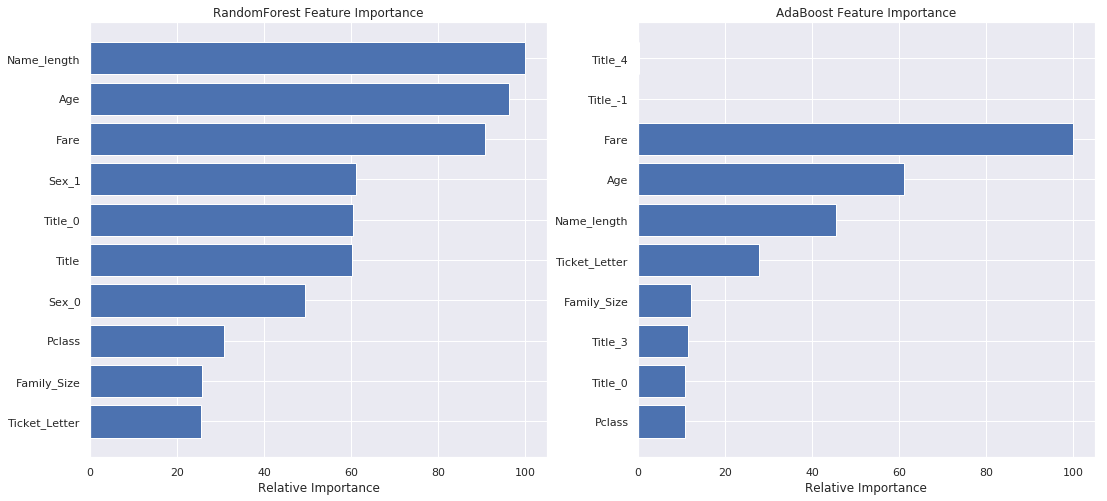

In [83]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')

plt.show()

## 6.3 模型融合（Model Ensemble）

常见的模型融合方法有：Bagging、Boosting、Stacking、Blending。

### 6.3.1 Bagging

Bagging将多个模型，也就是基学习器的预测结果进行简单的加权平均或者投票。它的好处是可以并行地训练基学习器。Random Forest就用到了Bagging的思想。

### 6.3.2 Boosting

Boosting的思想有点像知错能改，每个基学习器是在上一个基学习器学习的基础上，对上一个基学习器的错误进行弥补。我们将会用到的AdaBoost，Gradient Boost就用到了这种思想。

### 6.3.3. Stacking

Stacking是用新的次学习器去学习如何组合上一层的基学习器。如果把Bagging看作是多个基分类器的线性组合，那么Stacking就是多个基分类器的非线性组合。Stacking可以将学习器一层一层地堆砌起来，形成一个网状的结构。 相比来说Stacking的融合框架相对前面二者来说在精度上确实有一定的提升，所以在下面的模型融合上，我们也使用Stacking方法。

### 6.3.4 Blending

Blending和Stacking很相似，但同时它可以防止信息泄露的问题。

### Stacking框架融合：这里我们使用了两层的模型融合

Level 1使用了：Random Forest、AdaBoost、ExtraTrees、GBDT、Decision Tree、KNN、SVM，一共7个模型

Level 2使用了XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。

#### Level 1：

Stacking框架是堆叠使用基础分类器的预测作为对二级模型的训练的输入。然而，我们不能简单地在全部训练数据上训练基本模型，产生预测，输出用于第二层的训练。如果我们在Train Data上训练，然后在Train Data上预测，就会造成标签。为了避免标签，我们需要对每个基学习器使用K-fold，将Kge模型对Valid Set的预测结果拼起来，作为下一层学习器的输入。

所以这里我们建立输出fold预测方法

In [85]:
from sklearn.model_selection import KFold
 
# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,random_state=SEED,shuffle=False)
 
def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr,y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

构建不同的基学习器，这里我们使用了RandomForest、AdaBoost、ExtraTrees、GBDT、DecisionTree、KNN、SVM七个基学习器：（这里的模型可以使用如上面的GridSearch方法对模型的超参数进行搜索选择

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
et = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,max_depth=8,min_samples_leaf=2,verbose=0)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
 
knn = KNeighborsClassifier(n_neighbors=2)
 
svm = SVC(kernel='linear',C=0.025)


In [87]:
# 将pandas转换为arrays

# Create Numpy arrays of train,test and target(Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values   #Creates an array of the train data
x_test = titanic_test_data_X.values   #Creates an array of the test data
y_train = titanic_train_data_Y.values

In [88]:
# Create our OOF train and test predictions.These base result will be used as new featurs
rf_oof_train,rf_oof_test = get_out_fold(rf,x_train,y_train,x_test)  # Random Forest
ada_oof_train,ada_oof_test = get_out_fold(ada,x_train,y_train,x_test)  # AdaBoost
et_oof_train,et_oof_test = get_out_fold(et,x_train,y_train,x_test)  # Extra Trees
gb_oof_train,gb_oof_test = get_out_fold(gb,x_train,y_train,x_test)  # Gradient Boost
dt_oof_train,dt_oof_test = get_out_fold(dt,x_train,y_train,x_test)  #Decision Tree
knn_oof_train,knn_oof_test = get_out_fold(knn,x_train,y_train,x_test)  # KNeighbors
svm_oof_train,svm_oof_test = get_out_fold(svm,x_train,y_train,x_test)  # Support Vector
 
print("Training is complete")

Training is complete


### 6.4 预测并生成提交文件

Level 2：我们利用XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。

In [89]:
x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
x_test =np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)

In [90]:
from xgboost import XGBClassifier
 
gbm = XGBClassifier(n_estimators=200,max_depth=4,min_child_weight=2,gamma=0.9,subsample=0.8,
                    colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=1).fit(x_train,y_train)
predictions = gbm.predict(x_test)

ModuleNotFoundError: No module named 'xgboost'

In [91]:
StackingSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')

NameError: name 'predictions' is not defined

## 7. 验证：学习曲线

在我们对数据不断地进行特征工程，产生的特征越来越多，用大量的特征对模型进行训练，会使我们的训练集拟合得越来越好，但同时也可能会逐渐丧失泛化能力，从而在测试数据上表现不佳，发生过拟合现象。 当然我们建立的模型可能不仅在预测集上表现不好，也很可能是因为在训练集上的表现不佳，处于欠拟合状态。 下图是在吴恩达老师的机器学习课程上给出的四种学习曲线：

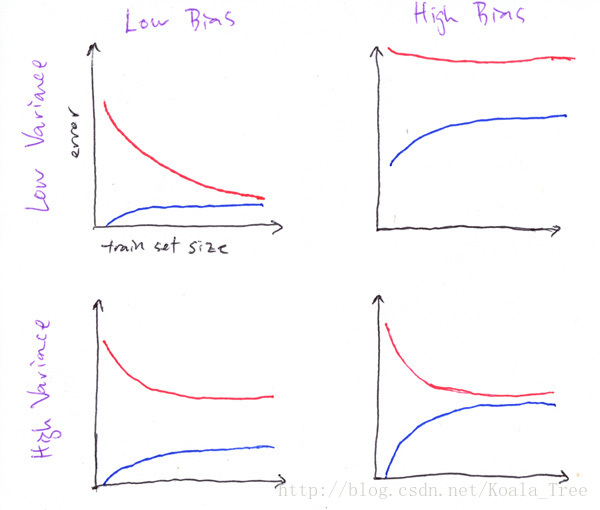

上面红线代表test error（Cross-validation error），蓝线代表train error。这里我们也可以把错误率替换为准确率，那么相应曲线的走向就应该是上下颠倒的，（score=1-error）。

注意我们的图中是error曲线。

- 左上角是最优情况，随着样本数的增加，train error虽然有一定的增加，但是test error却有很明显的降低；

- 右上角是最差情况，train error很大，模型并没有从特征 中学习到什么，导致test error非常大，模型几乎无法预测数据，需要去寻找数据本身和训练阶段的原因；

- 左下角是high variance，train error虽然较低，但是模型产生了过拟合，缺乏泛化能力，导致test error很高；

- 右下角是high bias的情况，train error很高，这时需要去调整模型的参数，减小train error。

所以我们通过学习曲线观察模型处于什么样的状态。从而决定对模型进行如何的操作。当然，我们把验证放到最后，并不是这一步在最后去做。对于我们的Stacking框架中第一层的各个基学习器我们都应该对其学习曲线进行观察，从而去更好地调节超参数，进而得到更好的最终结果。构建绘制学习曲线的函数：

In [92]:
from sklearn.learning_curve import learning_curve
 
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                        n_jobs=1,train_sizes=np.linspace(.1,1.0,5),verbose=0):
    """
    Generate a simple plot of the test and training learning curve.
    
    Parameters
    -------------
    estimator:object type that implents the "fit" and "predict" methods
    An object of that type which is cloned for each validation.
    
    title:string
    Title for the chart.
    
    X:array-like,shape(n_samples,n_features)
    Training vector,where n_samples is the number of samples and n_features is 
    the number of features.
    
    y:array-like,shape(n_samples) or (n_samples,n_features),optional
    Target relative to X for classification or regression;
    None for unsupervised learning.
    
    ylim:tuple,shape(ymin,ymax),optional
    Defines minimum and maximum yvalues plotted.
    
    cv:integer,cross-validation generator,optional
    If an integer is passed,it is the number of folds(defaults to 3).
    Specific cross-validation objects can be passed,see
    sklearn.cross_validation module for the list of possible objects
    
    n_jobs:integer,optional
    Number of jobs to run in parallel(default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,
                                                          n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

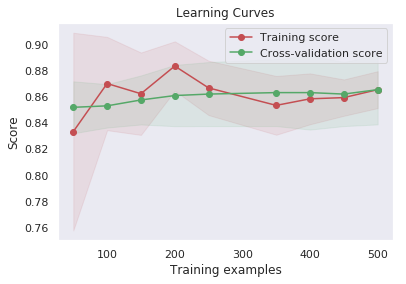

In [93]:
X = x_train
Y = y_train
 
# RandomForest
rf_parameters = {'n_jobs':-1,'n_estimators':500,'warm_start':True,'max_depth':6,
                 'min_samples_leaf':2,'max_features':'sqrt','verbose':0}
 
# AdaBoost
ada_parameters = {'n_estimators':500,'learning_rate':0.1}
 
# ExtraTrees
et_parameters = {'n_jobs':-1,'n_estimators':500,'max_depth':8,'min_samples_leaf':2,'verbose':0}
 
# GradientBoosting
gb_parameters = {'n_estimators':500,'max_depth':5,'min_samples_leaf':2,'verbose':0}
 
# DecisionTree
dt_parameters = {'max_depth':8}
 
# KNeighbors
knn_parameters = {'n_neighbors':2}
 
# SVM
svm_parameters = {'kernel':'linear','C':0.025}
 
# XGB
gbm_parameters = {'n_estimators':2000,'max_depth':4,'min_child_weight':2,'gamma':0.9,'subsample':0.8,
                  'colsample_bytree':0.8,'objective':'binary:logistic','nthread':-1,'scale_pos_weight':1}
 
 
title = "Learning Curves"
plot_learning_curve(RandomForestClassifier(**rf_parameters),title,X,Y,cv=None,n_jobs=4,
                    train_sizes=[50,100,150,200,250,350,400,450,500])
plt.show()


由上面的分析我们可以看出，对于RandomForest的模型，这里是存在一定的问题的，所以我们需要去调整模型的超参数，从而达到更好的效果。

# 8. 超参数调试

将生成的提交文件到Kaggle，得分结果：0.79425

xgboost stacking：0.78468

voting bagging：0.79904

这也说明了我们的stacking模型还有很大的改进空间。所以我们可以在以下几个方面进行改进，提高模型预测的精度：

特征工程：寻找更好的特征、删去影响较大的冗余特征；

模型超参数调试：改进欠拟合或者过拟合的状态；

改进模型框架：对于stacking框架的各层模型进行更好的选择；

调参的过程慢慢尝试吧。

## 更多机器学习内容，有兴趣同学可以看 sklearn

官网：https://scikit-learn.org/stable/